In [1]:
%matplotlib inline
from copy import deepcopy
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = (16,9)
plt.style.use('ggplot')
#importing the dataset
data = pd.read_csv('movie_metadata1.csv')
print (data.shape)
print (data.head)

(5043, 28)
<bound method NDFrame.head of                  color       director_name  num_critic_for_reviews  duration  \
0                Color       James Cameron                     723       178   
1                Color      Gore Verbinski                     302       169   
2                Color          Sam Mendes                     602       148   
3                Color   Christopher Nolan                     813       164   
4                   49         Doug Walker                      49        49   
5                Color      Andrew Stanton                     462       132   
6                Color           Sam Raimi                     392       156   
7                Color        Nathan Greno                     324       100   
8                Color         Joss Whedon                     635       141   
9                Color         David Yates                     375       153   
10               Color         Zack Snyder                     673       183   

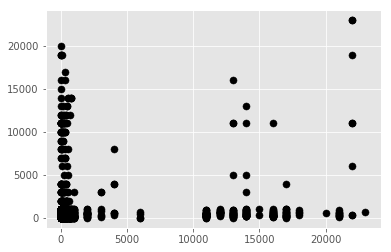

In [2]:
#Getting the values and plotting it
f1 = data['director_facebook_likes'].values
f2 = data['actor_3_facebook_likes'].values
X = np.array(list(zip(f1, f2)))
plt.scatter(f1, f2, c = 'black', s=50)

In [3]:
#Euclidean distance calculator
def dist(a,b, ax =1):
    return np.linalg.norm(a-b,axis = ax)
#Number of clusters
k =5
#X coordinates of random centroids
C_x = np.random.randint(0, np.max(X)-20, size = k)
#Y coordinates of random centroids
C_y = np.random.randint(0, np.max(X)-20, size = k)
C = np.array(list(zip(C_x, C_y)),dtype = np.float32)
print(C)

[[ 1218.  5434.]
 [ 5600.  5467.]
 [18366.  2176.]
 [17426. 12616.]
 [ 9665.  8472.]]


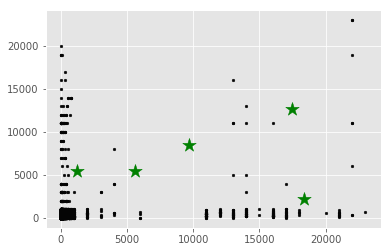

In [4]:
#plotting along with the Centroids
plt.scatter(f1,f2, c = '#050505', s = 7)
plt.scatter(C_x, C_y, marker ='*', s = 200, c = 'g')

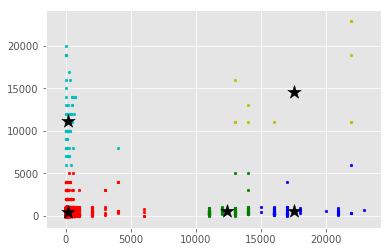

In [5]:
# To store the value of centroids when it updates
C_old = np.zeros(C.shape)
# Cluster Lables(0, 1, 2)
clusters = np.zeros(len(X))
# Error func. - Distance between new centroids and old centroids
error = dist(C, C_old, None)
# Loop will run till the error becomes zero
while error != 0:
    # Assigning each value to its closest cluster
    for i in range(len(X)):
        distances = dist(X[i], C)
        cluster = np.argmin(distances)
        clusters[i] = cluster
    # Storing the old centroid values
    C_old = deepcopy(C)
    # Finding the new centroids by taking the average value
    for i in range(k):
        points = [X[j] for j in range(len(X)) if clusters[j] == i]
        C[i] = np.mean(points, axis=0)
    error = dist(C, C_old, None)

colors = ['r', 'g', 'b', 'y', 'c', 'm']
fig, ax = plt.subplots()
for i in range(k):
        points = np.array([X[j] for j in range(len(X)) if clusters[j] == i])
        ax.scatter(points[:, 0], points[:, 1], s=7, c=colors[i])
ax.scatter(C[:, 0], C[:, 1], marker='*', s=200, c='#050505')

array([0., 0., 0., ..., 0., 0., 0.])